In [1]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
import random
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Load the Dataset
df_rating_books_raw = pd.read_csv('../data/processed/filtered_data_processed.csv')

df_rating_books_raw .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502044 entries, 0 to 502043
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      502044 non-null  int64  
 1   index           502044 non-null  int64  
 2   review          502044 non-null  float64
 3   text            502044 non-null  object 
 4   review_year     502044 non-null  int64  
 5   authors         502044 non-null  object 
 6   publisher       502044 non-null  object 
 7   categories      502044 non-null  object 
 8   published_year  502044 non-null  int64  
 9   helpfulness     502044 non-null  float64
 10  num_row         502044 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 42.1+ MB


In [3]:
df_rating_books_processed = df_rating_books_raw.drop(['Unnamed: 0'], axis=1)

In [4]:
df_vader_sentiment_raw = pd.read_csv('../data/processed/df_reduced_with_sentiment.csv')

df_vader_sentiment_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502044 entries, 0 to 502043
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          502044 non-null  int64  
 1   num_row             502044 non-null  int64  
 2   text_clean          502041 non-null  object 
 3   compound_sentiment  502044 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 15.3+ MB


In [5]:
df_vader_sentiment_processed = df_vader_sentiment_raw.drop(['Unnamed: 0'], axis=1)
df_vader_sentiment_processed.sample()

,num_row,text_clean,compound_sentiment
381495,381495,final lengthier conclusion trilogy full realiz...,0.802


In [6]:
df_all_data_processed = df_rating_books_processed.merge(df_vader_sentiment_processed, on='num_row', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502044 entries, 0 to 502043
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               502044 non-null  int64  
 1   review              502044 non-null  float64
 2   text                502044 non-null  object 
 3   review_year         502044 non-null  int64  
 4   authors             502044 non-null  object 
 5   publisher           502044 non-null  object 
 6   categories          502044 non-null  object 
 7   published_year      502044 non-null  int64  
 8   helpfulness         502044 non-null  float64
 9   num_row             502044 non-null  int64  
 10  text_clean          502041 non-null  object 
 11  compound_sentiment  502044 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 46.0+ MB


In [7]:
#Original Text is removed as clean text is added
df_all_data_processed = df_all_data_processed.drop(['text'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502044 entries, 0 to 502043
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               502044 non-null  int64  
 1   review              502044 non-null  float64
 2   review_year         502044 non-null  int64  
 3   authors             502044 non-null  object 
 4   publisher           502044 non-null  object 
 5   categories          502044 non-null  object 
 6   published_year      502044 non-null  int64  
 7   helpfulness         502044 non-null  float64
 8   num_row             502044 non-null  int64  
 9   text_clean          502041 non-null  object 
 10  compound_sentiment  502044 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 42.1+ MB


In [8]:
df_all_data_processed = df_all_data_processed.drop(['index'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502044 entries, 0 to 502043
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review              502044 non-null  float64
 1   review_year         502044 non-null  int64  
 2   authors             502044 non-null  object 
 3   publisher           502044 non-null  object 
 4   categories          502044 non-null  object 
 5   published_year      502044 non-null  int64  
 6   helpfulness         502044 non-null  float64
 7   num_row             502044 non-null  int64  
 8   text_clean          502041 non-null  object 
 9   compound_sentiment  502044 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 38.3+ MB


In [9]:
df_all_data_processed = df_all_data_processed.drop(['num_row'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502044 entries, 0 to 502043
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review              502044 non-null  float64
 1   review_year         502044 non-null  int64  
 2   authors             502044 non-null  object 
 3   publisher           502044 non-null  object 
 4   categories          502044 non-null  object 
 5   published_year      502044 non-null  int64  
 6   helpfulness         502044 non-null  float64
 7   text_clean          502041 non-null  object 
 8   compound_sentiment  502044 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 34.5+ MB


In [10]:
def custom_string_to_list(s):
    if isinstance(s, str):
        return [item.strip(" '[]") for item in s.split(',')]
    else:
        return s

In [11]:
df_all_data_processed['authors'] = df_all_data_processed['authors'].apply(custom_string_to_list)
df_all_data_processed['categories'] = df_all_data_processed['categories'].apply(custom_string_to_list)

In [12]:
ordered_columns = ['authors', 'categories', 'publisher', 'published_year', 'review_year', 'helpfulness', 'text_clean','compound_sentiment', 'review']

In [13]:
df_all_data_processed = df_all_data_processed[ordered_columns]

In [14]:
df_all_data_processed.sample(10)

,authors,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment,review
415826,[Other],[Fiction],Penguin,2017,2012,1.000000,gay brother reading book kind borrowed nights ...,0.8999,4.0
144942,[Other],[Biography & Autobiography],Penguin,1983,2008,1.000000,seeing images late s early s surprising still ...,0.9761,4.0
204512,[Other],[Fiction],Other,2000,2000,0.750000,reading many books navy seals say &quot;insurr...,0.7096,5.0
403413,[Other],[Fiction],Random House,2009,2013,1.000000,really liked first lee child book definitely b...,0.8012,4.0
420032,[Other],[Other],Other,2006,2005,1.000000,pick book browsing manga book store actually w...,0.5823,4.0
243220,[Other],[Other],Other,1999,1999,0.750000,loved divinations charms spells book full much...,0.9201,5.0
414946,[Other],[Other],Other,2014,2013,1.000000,lot ideas book make sense really think it ofte...,0.3612,5.0
167851,[Other],[Fiction],Other,2000,1999,0.875000,thoroughly enjoyed book took another place tim...,0.8012,5.0
184154,[Other],[Fiction],Other,2002,2009,1.000000,unlike girls seldom read love stories time det...,-0.9907,4.0
299740,[Other],[Computers],Other,2000,2000,0.666667,bought book thinking least downloadable versio...,0.7906,2.0


# Analysis and EDA for target feature

In [15]:
df_all_data_processed['review'].value_counts()

review
5.0    300940
4.0     98069
3.0     42657
1.0     34329
2.0     26049
Name: count, dtype: int64

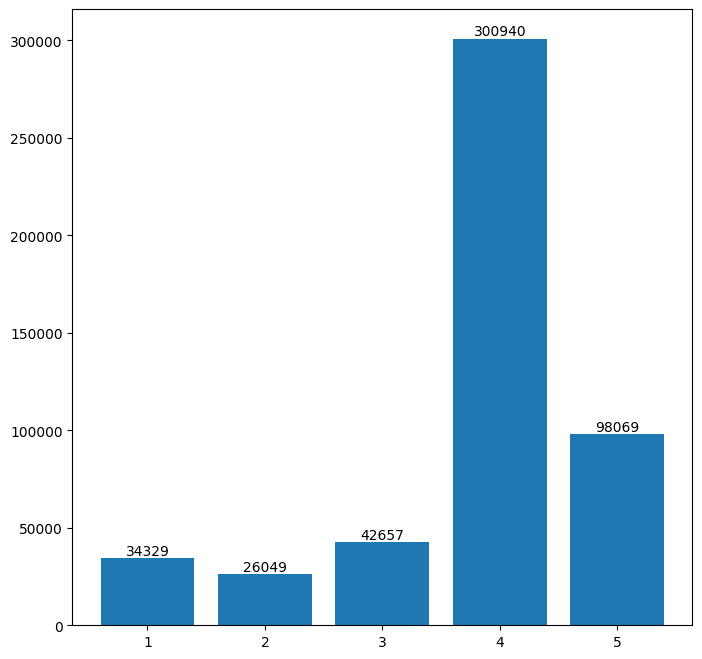

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['review'].unique(), df_all_data_processed['review'].value_counts())
ax.bar_label(bars)
plt.show()

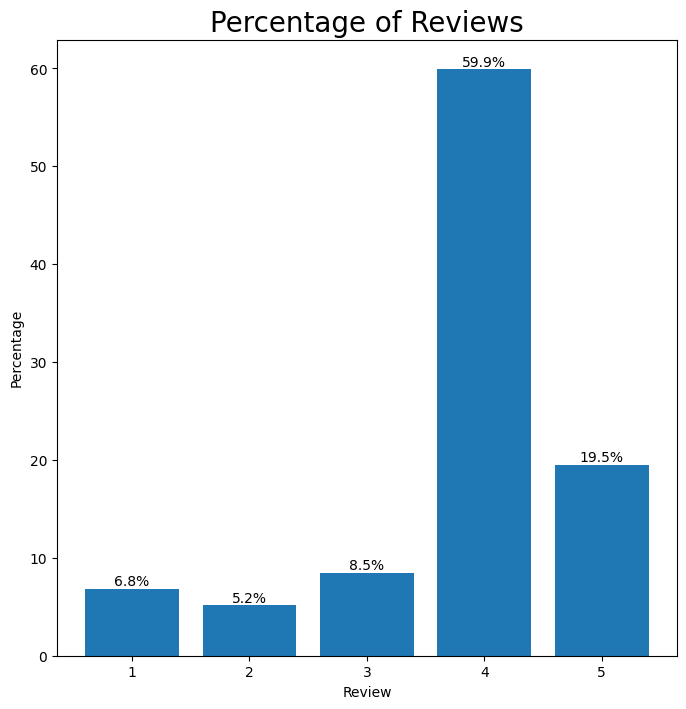

In [17]:
#Show a barplot by Percentages
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['review'].unique(), (df_all_data_processed['review'].value_counts())/(df_all_data_processed['review'].value_counts().sum())*100)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Review')
plt.ylabel('Percentage')
plt.title('Percentage of Reviews', fontsize = 20)
plt.show()

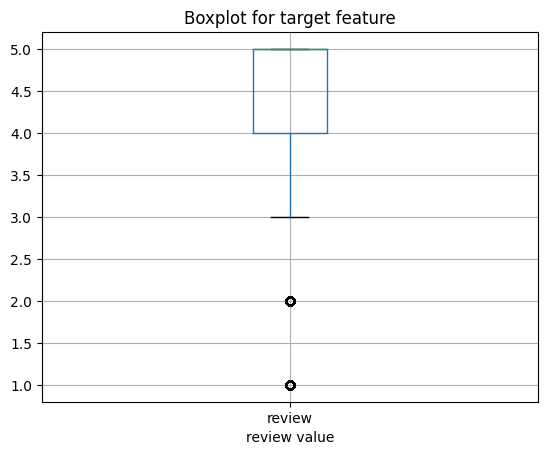

In [18]:
#Create a box plot to check for outliers, median and quartiles
df_all_data_processed.boxplot(column='review')
plt.xlabel("review value")
plt.title("Boxplot for target feature")
plt.show()

In [19]:
df_all_data_processed['review'].describe().T

count    502044.000000
mean          4.205556
std           1.210411
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review, dtype: float64

## Key Findings:
- The Dataset is unbalanced. Having 79.4% of the entries with a High/Postive review [4, 5]. Only 12% of the entries have a Low/Negative review [1, 2]. And 8.5% of the entries reviews are neutral [3]
- The Dataset review target feature is biased. Having the 25% Quartile above 4, and 50% and 75% Quartiles on 5. 
- The entries on the dataset with a low review [1, 2] are almost considered as outliers on the boxplot.

# Univariate EDA

## Categories

In [20]:
categories = df_all_data_processed['categories'].explode()
categories.info()

<class 'pandas.core.series.Series'>
Index: 502145 entries, 0 to 502043
Series name: categories
Non-Null Count   Dtype 
--------------   ----- 
502145 non-null  object
dtypes: object(1)
memory usage: 7.7+ MB


In [21]:
print(f'Total of Categories: {len(categories.unique())}')

Total of Categories: 10


In [22]:
categories_counts = categories.value_counts()
print(f'Total of entries after explode category column {categories_counts.sum()}')

Total of entries after explode category column 502145


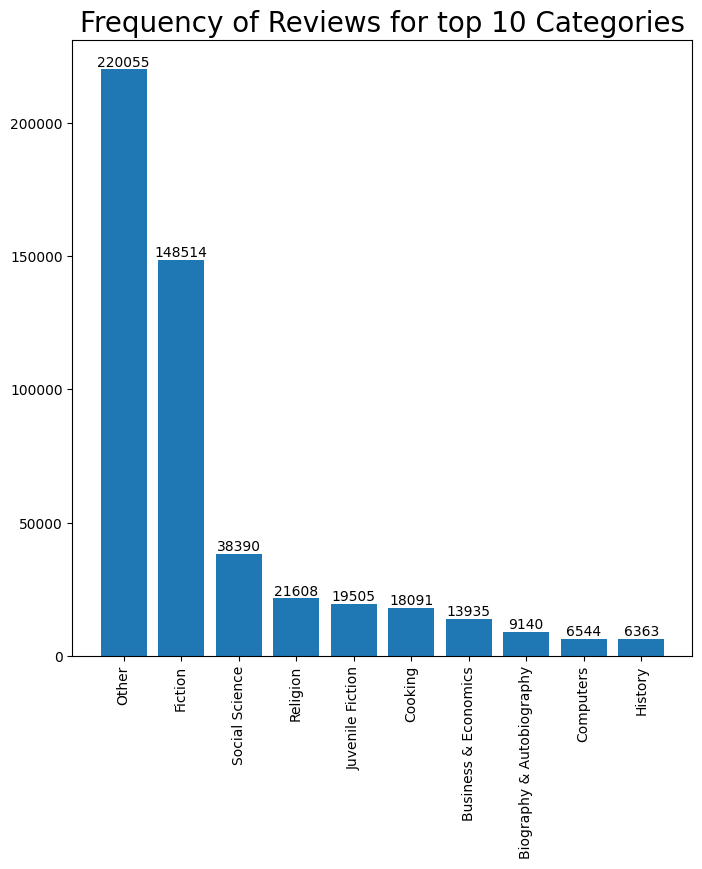

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['categories'].explode().unique(), df_all_data_processed['categories'].explode().value_counts())
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews for top 10 Categories', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

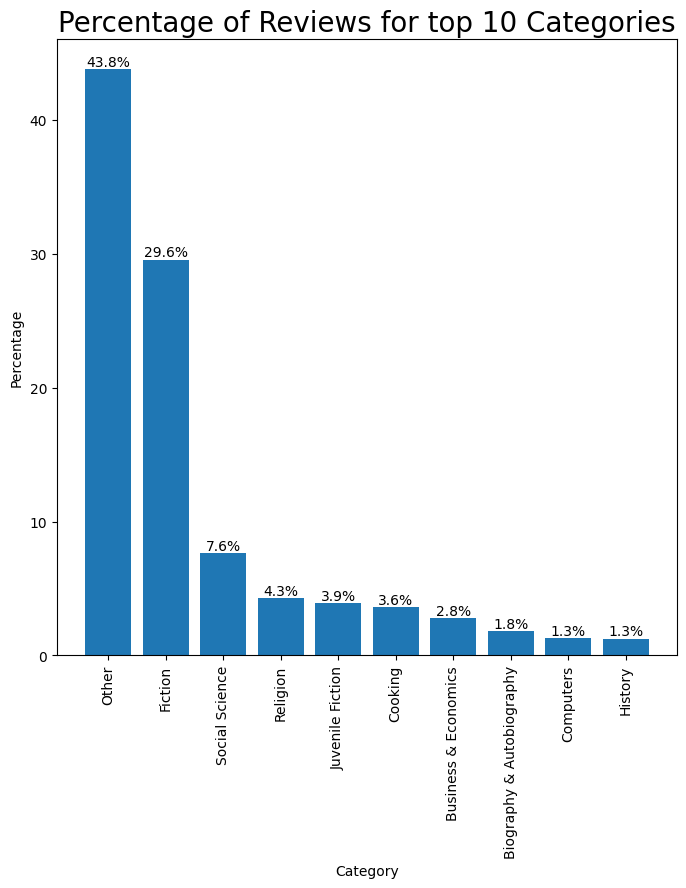

In [24]:
#Show a barplot by Percentages
category_percetage = df_all_data_processed['categories'].explode().value_counts()/df_all_data_processed['categories'].explode().value_counts().sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['categories'].explode().unique(), category_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Categories', fontsize = 20)
plt.show()

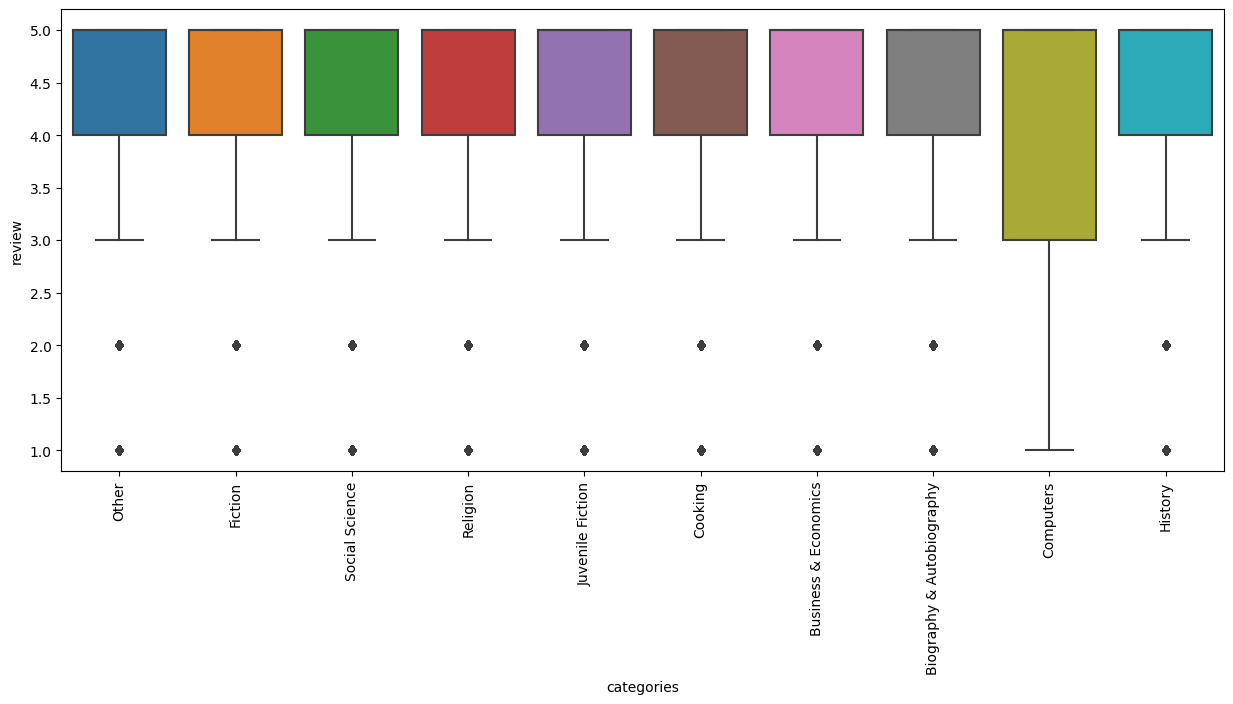

In [25]:
plt.figure(figsize=(15, 6))  # Set the figure size
sns.boxplot(x='categories', y='review', data=df_all_data_processed.explode('categories'))
plt.xticks(rotation=90)
plt.show()

In [26]:
df_all_data_processed['categories'].explode().unique()

array(['Other', 'Fiction', 'Social Science', 'Religion',
       'Juvenile Fiction', 'Cooking', 'Business & Economics',
       'Biography & Autobiography', 'Computers', 'History'], dtype=object)

### Key Findings for Categories:

- There are 10 different Categories in the Dataset.
- All of the reviewed categories contains reviews values in the 5 Categories [1, 2, 3, 4, 5]. All of the are biased to high review score.
- All categories but 'Computers' have lower quartile limit in Rating of 4 and minimum values of 3, but with outliers in 1 and 2 score reviews groups. 'Computers have the 25% quartile of 3 and minimum of 1.
- 'Fiction' is most rated category after grouped 'Others'. This category is biased to High review scores, having the mean on 4.5. And the 25% quartile on 4.

## Authors

In [27]:
authors = df_all_data_processed['authors'].explode()
authors.info()

<class 'pandas.core.series.Series'>
Index: 502912 entries, 0 to 502043
Series name: authors
Non-Null Count   Dtype 
--------------   ----- 
502912 non-null  object
dtypes: object(1)
memory usage: 7.7+ MB


In [28]:
print(f'Total of Authors: {len(authors.unique())}')

Total of Authors: 10


In [29]:
author_counts = authors.value_counts(ascending=False)
print(f'Total of entries after explode authors column {author_counts.sum()}')

Total of entries after explode authors column 502912


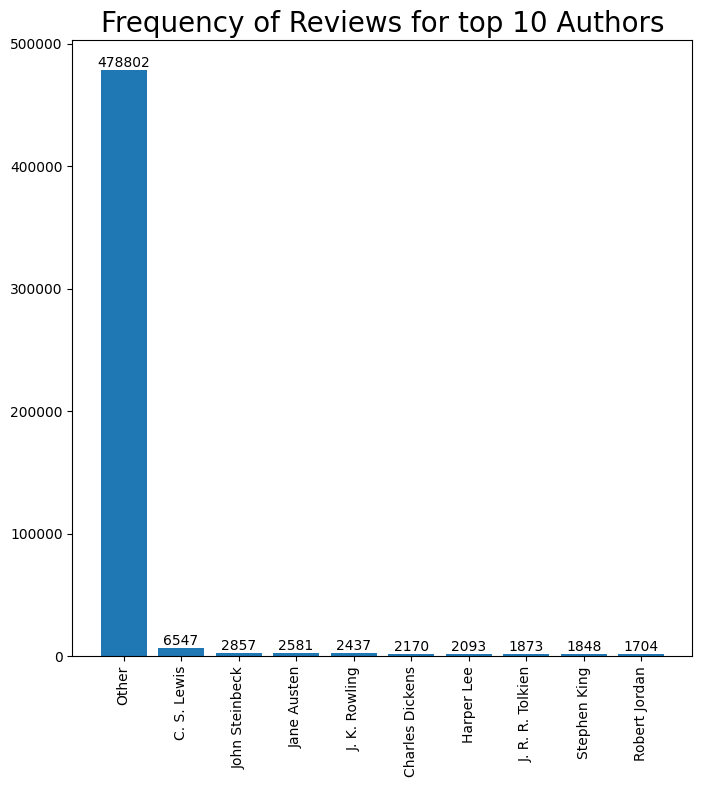

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['authors'].explode().unique(), df_all_data_processed['authors'].explode().value_counts())
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews for top 10 Authors', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

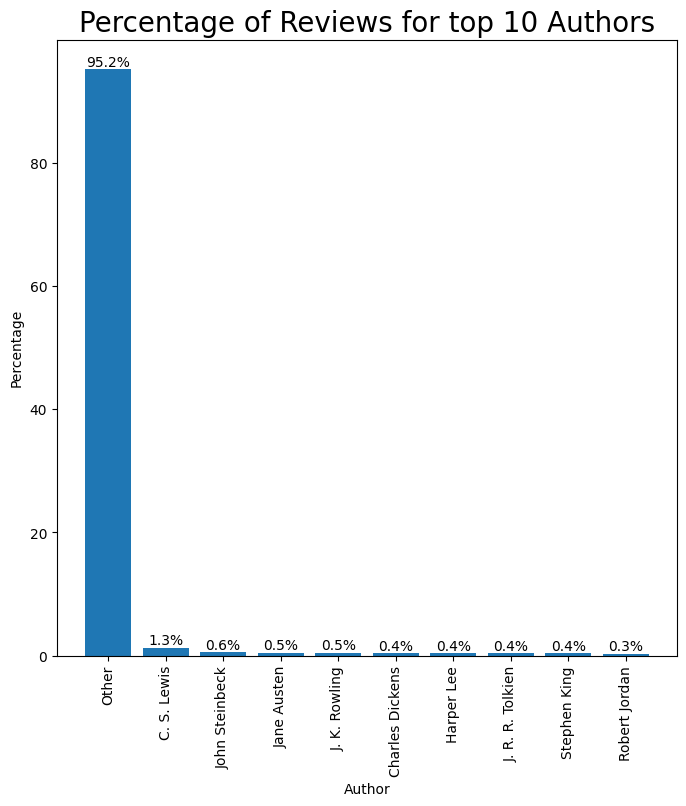

In [31]:
#Show a barplot by Percentages
author_percetage = df_all_data_processed['authors'].explode().value_counts()/df_all_data_processed['authors'].explode().value_counts().sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['authors'].explode().unique(), author_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Author')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Authors', fontsize = 20)
plt.show()


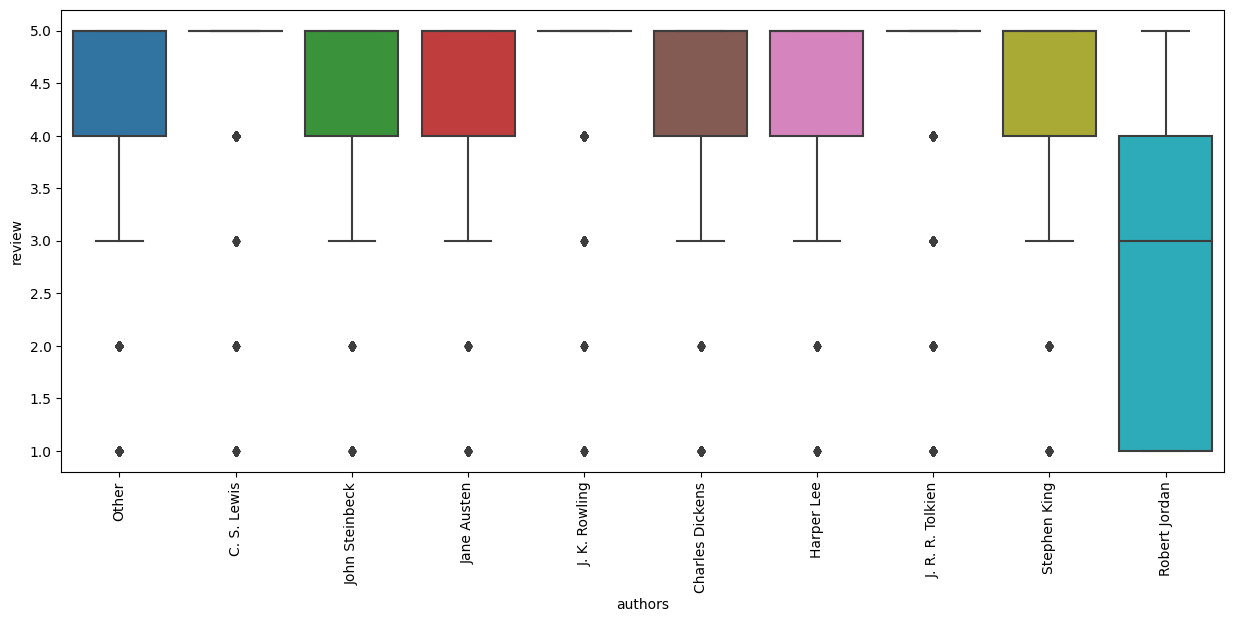

In [32]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(x='authors', y='review', data=df_all_data_processed.explode('authors'))
plt.xticks(rotation=90)
plt.show()

### Key Findings for Authors

- All of the reviewed authors contains reviews values in the 5 review scores [1 , 2, 3, 4, 5]. All of the authors but Robert Jordan, are biased to high review score. J. R. R. Tolkien, J.K Rowling and C.S. Lewis show the 25%, 50% and 75% quartiles of 5 review score. Robert Jordan has a review score more balanced, with the median on 3 and de quartile 75% under 4.
- Others authors represent the 95.2% of the Dataset. 


## Published Year

In [95]:
pub_year = df_all_data_processed[['published_year','review']]
pub_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502044 entries, 0 to 502043
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   published_year  502044 non-null  int64  
 1   review          502044 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 7.7 MB


In [96]:
pub_year = pub_year.groupby('published_year')['review'].agg(['mean', 'count']).reset_index()
pub_year

,published_year,mean,count
0,101,4.066667,15
1,1016,1.000000,1
2,1580,4.066667,15
3,1581,5.000000,1
4,1598,4.526316,19
...,...,...,...
279,2021,4.202281,9645
280,2022,4.200569,2812
281,2023,4.500000,44
282,2024,3.500000,2


In [97]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145224193')

In [98]:
pub_year = pub_year[pub_year['published_year']>pd.Timestamp.min.year]

In [99]:
pub_year['published_year'].describe().T

count     270.000000
mean     1885.385185
std        86.817973
min      1682.000000
25%      1823.250000
50%      1890.500000
75%      1957.750000
max      2030.000000
Name: published_year, dtype: float64

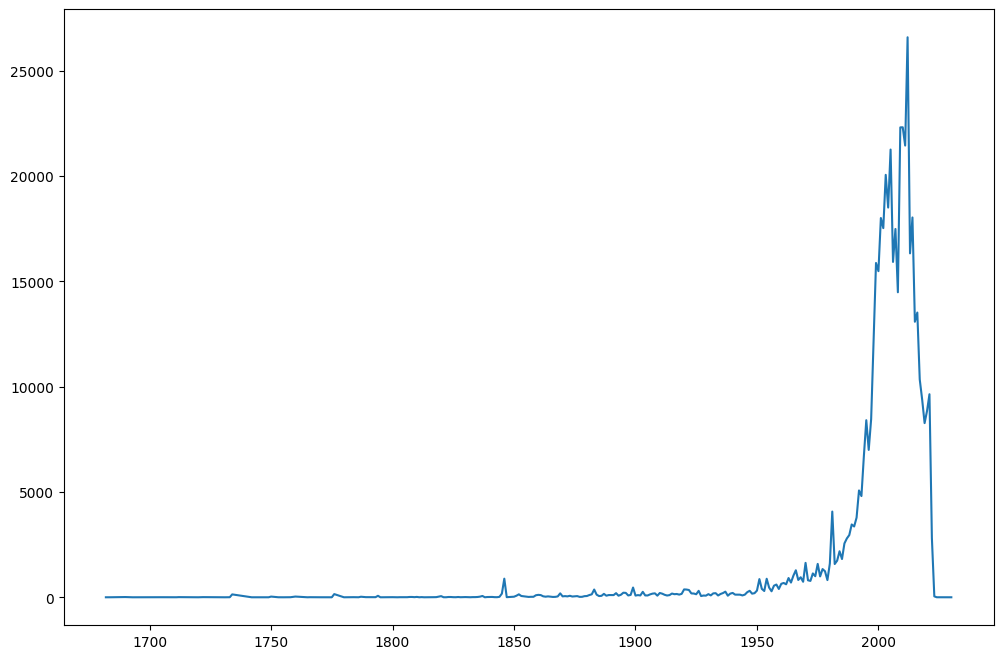

In [105]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(pub_year['published_year'], pub_year['count'], linestyle='-')
plt.show()

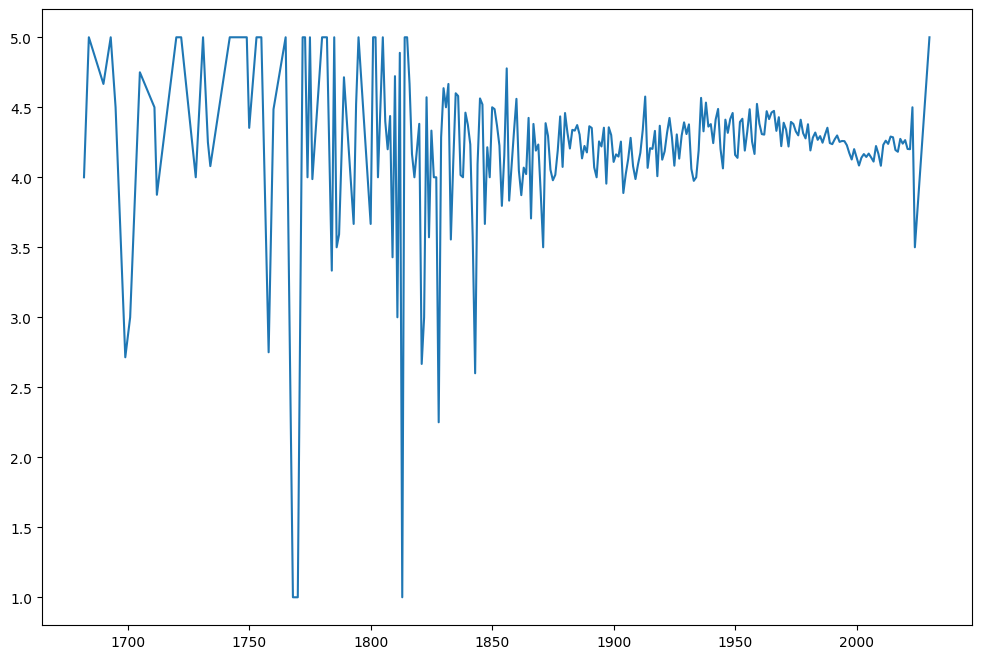

In [106]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(pub_year['published_year'], pub_year['mean'], linestyle='-')
plt.show()

In [60]:
pub_year_counts = df_all_data_processed['published_year'].value_counts(ascending=False)
top_10_pub_year_counts = pub_year_counts[:10].sort_values(ascending=False)
top_10_pub_year_counts

published_year
2012    26599
2010    22324
2009    22319
2011    21456
2005    21266
2003    20065
2004    18511
2014    18041
2001    18014
2002    17535
Name: count, dtype: int64

In [61]:
other_pub_year_counts = pub_year_counts[10:].sum()
other_pub_year_counts

295914

In [62]:
top_pub_year_with_other = pd.concat([top_10_pub_year_counts, pd.Series({'Other': other_pub_year_counts})])
top_pub_year_with_other = top_pub_year_with_other.groupby(top_pub_year_with_other.index).sum()
top_pub_year_with_other = top_pub_year_with_other.sort_values(ascending=False)
top_pub_year_with_other

Other    295914
2012      26599
2010      22324
2009      22319
2011      21456
2005      21266
2003      20065
2004      18511
2014      18041
2001      18014
2002      17535
dtype: int64

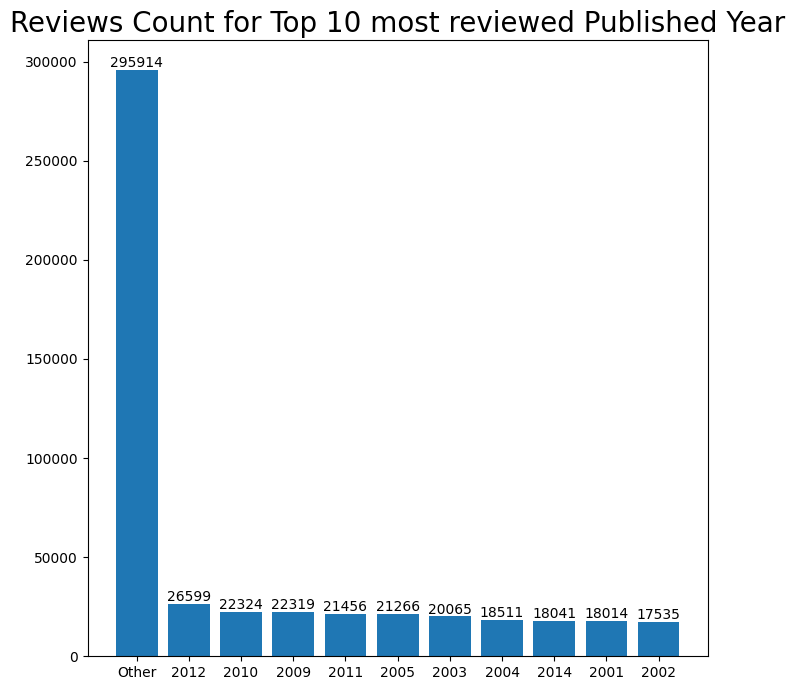

In [63]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_pub_year_with_other.keys().map(str), top_pub_year_with_other)
ax.bar_label(bars)
plt.title('Reviews Count for Top 10 most reviewed Published Year', fontsize = 20)
plt.show()

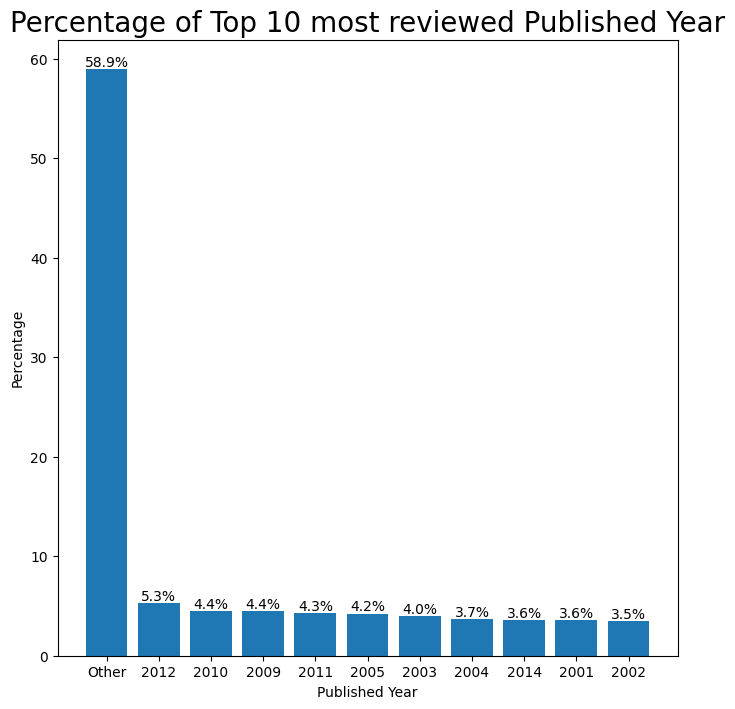

In [64]:
#Show a barplot by Percentages
pub_year_percetage = top_pub_year_with_other/pub_year_counts.sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_pub_year_with_other.keys().map(str), pub_year_percetage)

ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Published Year')
plt.ylabel('Percentage')
plt.title('Percentage of Top 10 most reviewed Published Year', fontsize = 20)
plt.show()

## Helpfulness

In [ ]:
df_all_data.sample(2)

In [ ]:
# helpfulness 0/0 = 1 o 0/0 = 0. Revisar ambos
# El 3 es un caso unico aislado (remover), pero si no, analisis.

In [ ]:
df_all_data['helpfulness_0'].describe().T

In [ ]:
df_all_data['helpfulness_1'].describe().T

In [ ]:
#Create a box plot to check for outliers, median and quartiles 4/6 0/0 1/3 5/5
df_all_data.boxplot(column='helpfulness_0')
plt.xlabel("review value")
plt.title("Boxplot for helpfulness with 0/0 = 0 feature")
plt.show()

In [ ]:
#Create a box plot to check for outliers, median and quartiles
df_all_data.boxplot(column='helpfulness_1')
plt.xlabel("review value")
plt.title("Boxplot for helpfulness with 0/0 = 1 feature")
plt.show()

In [ ]:
df_all_data.hist(column='helpfulness_0')
plt.show()

In [ ]:
df_all_data.hist(column='helpfulness_1')
plt.show()

In [ ]:
#Correlation Analysis 
df_all_data[['helpfulness_0','helpfulness_1','review']].corr().style.background_gradient(cmap='Blues')

In [ ]:
#Check helpfulness agains review 
plt.figure(figsize=(8, 6))
plt.scatter(df_all_data['helpfulness_1'], df_all_data['review'], alpha=0.5) 

# Set labels and title
plt.xlabel('helpfulness')
plt.ylabel('review')
plt.title('Scatter Plot of helpfulness vs. review')

# Show the plot
plt.grid(True)  # Add grid lines for better visualization
plt.show()

#FIXME Numerica vs Numerica debe ser un scatterplot

In [ ]:
category_palette = sns.color_palette("Set1")
plt.figure(figsize=(10, 10))
sns.pairplot(data=df_all_data[['helpfulness_1','review']], palette=category_palette,markers=["o", "s", "D"], hue="review", height=6)
plt.show()

## EDA for Review Text Column

In [ ]:
pd.set_option('display.max_colwidth', 150)

In [ ]:
df_all_data[df_all_data['review']==5]['text_clean'].sample(5, random_state=1299)

In [ ]:
wordcloud5 = WordCloud(max_words=1000).generate(str(df_all_data[df_all_data['review']==5]['text_clean']))

fig = plt.figure(figsize=(8,8))

plt.axis('off')

plt.imshow(wordcloud5)

plt.show()

In [ ]:
df_all_data[df_all_data['review']==1]['text_clean'].sample(5, random_state=1299)

In [ ]:
df_all_data[df_all_data['review']==3]['text_clean'].sample(5, random_state=1299)

In [ ]:
wordcloud1 = WordCloud(max_words=1000).generate(str(df_all_data[df_all_data['review']==1]['text_clean']))

fig = plt.figure(figsize=(10,8))

plt.axis('off')

plt.imshow(wordcloud1)

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_all_data['text_clean'].str.len(), df_all_data['review'], alpha=0.5)
plt.title('Review Length versus Review Score')
plt.xlabel('Review Length')
plt.ylabel('Review Score')
plt.show()

In [ ]:
df_all_data['text_clean'].str.len().mean()

In [ ]:
df_all_data['text_clean'].str.len().std()

In [ ]:
long_reviews = df_all_data[df_all_data['text_clean'].str.len() > 2000].copy()

len(long_reviews)

In [ ]:
long_reviews.describe().T

In [ ]:
long_reviews['text_clean'].str.len().mean()

In [ ]:
short_reviews = df_all_data[df_all_data['text_clean'].str.len() < 200].copy()

len(short_reviews)

In [ ]:
short_reviews['text_clean'].str.len().mean()

In [ ]:
short_reviews.describe().T

In [ ]:
high_reviews = df_all_data[df_all_data['review'] == 5].copy()

high_reviews['text_clean'].str.len().mean()

In [ ]:
neutral_reviews = df_all_data[df_all_data['review'] == 3].copy() # Neutral ratings tend to be larger in words count

neutral_reviews['text_clean'].str.len().mean()

In [ ]:
low_reviews = df_all_data[df_all_data['review'] == 1].copy()

low_reviews['text_clean'].str.len().mean()

In [ ]:
# Create a figure and a set background color
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('white')
plt.figure()
plt.hist2d(df_all_data['review_year'], df_all_data['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data[df_all_data['review'] != 5]['review_year'], df_all_data[df_all_data['review'] != 5]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data[(df_all_data['review'] != 4) & (df_all_data['review'] != 5)]['review_year'], df_all_data[(df_all_data['review'] != 4) & (df_all_data['review'] != 5)]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year (for rating from 1 to 5')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data[df_all_data['review_year'] <= 2000]['review_year'], df_all_data[df_all_data['review_year'] <= 2000]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()